# tunePowerTerms

## Tune certain terms with respect to two-turbine output power

In [4]:
# Needed Modules
%matplotlib inline
import os
from readSuperCONOUT import readSuperCONOUT
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
import cPickle as pickle
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

/nopt/nrel/apps/anaconda/2.2.0/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [10]:
# Load the provided power data

#Data is taken from 2 2-turbine data sets: 
#   "Base" run for this exersize
#   "ICOWES 2" data run previously with similar, but different, inflow

# Data where upstream turbine is yawed to different locations
#yawPos = 1D array of yaw positions of upstream turbine
#avPowersYaw = 2D array of mean power of upstream and downstream turbine
#yawPosI2 = 1D array of yaw positions of upstream turbine (ICOWES 2 dataset)
#avPowersYawI2 = 2D array of mean power of upstream and downstream turbine (ICOWES 2 dataset)

# Data where downstream turbine is moved downstream
#spacing = in D, location downstream from upstream turbine of 2nd turbine
#avPowersSpace = average power of each turbine

yawPos,avPowersYaw, yawPosI2,avPowersYawI2 = pickle.load( open( os.path.join('data','yawPower.p'), "rb" ) )
spacing,avPowersSpace = pickle.load( open( os.path.join('data','spacePower.p'), "rb" ) )

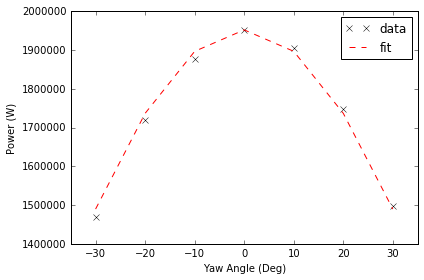

In [21]:
# Use the base data set to tune the power-loss coefficient
def powLoss(x,pP):
    return np.cos(np.radians(x))**pP

pP = 1.88
basePoint = avPowersYaw[3,0]

fig, ax = plt.subplots(1,1)
ax.plot(yawPos,avPowersYaw[:,0],'kx',label='data')
ax.plot(yawPos,basePoint * powLoss(yawPos,pP),'r--',label='fit')
ax.set_xlim([-35,35])
ax.set_xlabel('Yaw Angle (Deg)')
ax.set_ylabel('Power (W)')
plt.legend()

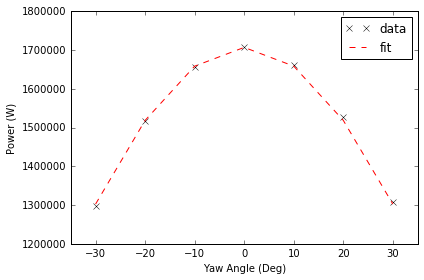

In [23]:
# Use the ICOWES2 data set to tune the power-loss coefficient
def powLoss(x,pP):
    return np.cos(np.radians(x))**pP

pP = 1.88
basePoint = avPowersYawI2[3,0]

fig, ax = plt.subplots(1,1)
ax.plot(yawPosI2,avPowersYawI2[:,0],'kx',label='data')
ax.plot(yawPosI2,basePoint * powLoss(yawPos,pP),'r--',label='fit')
ax.set_xlim([-35,35])
ax.set_xlabel('Yaw Angle (Deg)')
ax.set_ylabel('Power (W)')
plt.legend()